In [70]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## YSA ile lineer regresyon
1 nöron'a toplama işlemini öğretebilir miyiz? 

In [71]:
np.random.seed(0)

X = np.random.randint(0, 500, (10000, 2))
y = X[:,0] + X[:,1]

print("İlk 5 input:")
print(X[:5])

print("İlk 5 output:")
print(y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

İlk 5 input:
[[172  47]
 [117 192]
 [323 251]
 [195 359]
 [  9 211]]
İlk 5 output:
[219 309 574 554 220]


In [72]:
model_0 = Sequential()
model_0.add(Dense(1, input_shape=(2,)))
model_0.add(Activation("linear"))

model_0.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

In [73]:
history = model_0.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10)

Epoch 1/10
 39/125 [========>.....................] - ETA: 0s - loss: 269543.2188

2022-05-09 15:16:56.896585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 6ms/step - loss: 141937.6094 - val_loss: 31640.5938
Epoch 2/10
  1/125 [..............................] - ETA: 0s - loss: 33888.5547

2022-05-09 15:16:57.446550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 5ms/step - loss: 18447.0742 - val_loss: 10973.4316
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 7455.5444 - val_loss: 4279.9404
Epoch 4/10
125/125 [==============================] - 1s 6ms/step - loss: 2661.3713 - val_loss: 1343.3188
Epoch 5/10
125/125 [==============================] - 1s 6ms/step - loss: 770.3134 - val_loss: 341.5825
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 181.6011 - val_loss: 70.6183
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 34.8505 - val_loss: 12.1881
Epoch 8/10
125/125 [==============================] - 1s 5ms/step - loss: 5.5799 - val_loss: 1.8146
Epoch 9/10
125/125 [==============================] - 1s 5ms/step - loss: 0.8792 - val_loss: 0.3778
Epoch 10/10
125/125 [==============================] - 1s 5ms/step - loss: 0.2776 - val_loss: 0.2157


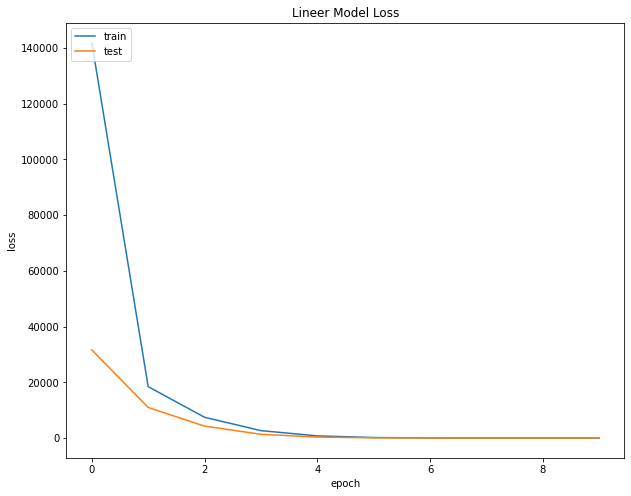

In [74]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lineer Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
model_0.predict([[55, 70]])

2022-05-09 15:17:03.877152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[125.944244]], dtype=float32)

In [76]:
model_0.predict([[10, 250], [0, 0], [15000, 115000]])

array([[2.6052100e+02],
       [1.2206352e+00],
       [1.2966334e+05]], dtype=float32)

## YSA ile lojistik regresyon
1 nöron'a sınıflandırmayı öğretebilir miyiz? 

In [77]:
y_loj = np.zeros(y.shape)

In [78]:
y_loj[y>500] = 1

In [79]:
print(y[:10])
print(y_loj[:10])

[219 309 574 554 220 519 379 542 484 507]
[0. 0. 1. 1. 0. 1. 0. 1. 0. 1.]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y_loj, test_size=0.2, random_state=42)

In [81]:
model_1 = Sequential()
model_1.add(Dense(1, input_shape=(2,)))
model_1.add(Activation("sigmoid"))

model_1.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

In [82]:
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=10)

Epoch 1/10
 27/125 [=====>........................] - ETA: 0s - loss: 65.0886 - accuracy: 0.4850

2022-05-09 15:17:04.113184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 33.4517 - accuracy: 0.5419

2022-05-09 15:17:04.938769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 8ms/step - loss: 33.4517 - accuracy: 0.5419 - val_loss: 1.5763 - val_accuracy: 0.6120
Epoch 2/10
125/125 [==============================] - 1s 9ms/step - loss: 0.6001 - accuracy: 0.7185 - val_loss: 0.4788 - val_accuracy: 0.8115
Epoch 3/10
125/125 [==============================] - 1s 9ms/step - loss: 0.4302 - accuracy: 0.8421 - val_loss: 0.3913 - val_accuracy: 0.8975
Epoch 4/10
125/125 [==============================] - 1s 9ms/step - loss: 0.3928 - accuracy: 0.8426 - val_loss: 0.3779 - val_accuracy: 0.9140
Epoch 5/10
125/125 [==============================] - 1s 9ms/step - loss: 0.3479 - accuracy: 0.8773 - val_loss: 0.3786 - val_accuracy: 0.8690
Epoch 6/10
125/125 [==============================] - 1s 9ms/step - loss: 0.3132 - accuracy: 0.9066 - val_loss: 0.2943 - val_accuracy: 0.9870
Epoch 7/10
125/125 [==============================] - 1s 8ms/step - loss: 0.2946 - accuracy: 0.9083 - val_loss: 0.2872 - val_accuracy: 0.9555
Epoch 8/10
125/1

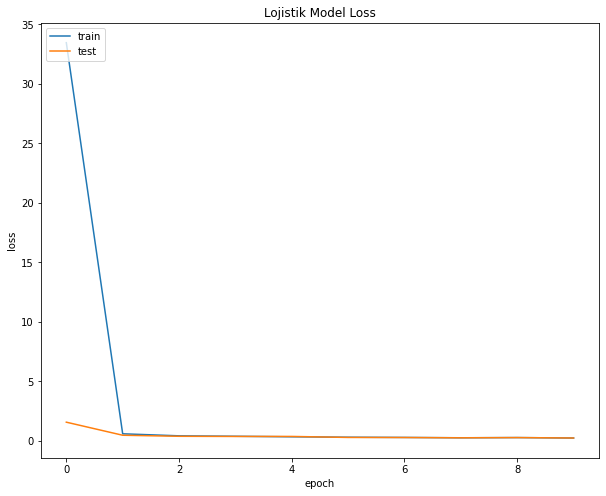

In [83]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lojistik Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
model_1.predict([[0, 0], [1000, 1000], [100, 150], [500, 400]])

2022-05-09 15:17:15.121150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.00254559],
       [0.9999999 ],
       [0.04185098],
       [0.9845478 ]], dtype=float32)

## YSA ile resim sınıflandırma
### 1) 2 sınıf - 1 nöron

!pip install idx2numpy

!wget https://github.com/ihpar/ibu_cv/raw/main/mnist/m_nist.zip

!unzip /content/m_nist.zip -d m_nist

In [85]:
import idx2numpy

In [99]:
MNIST_DIR = "/content/m_nist/"
# MNIST_DIR = "../mnist/"

In [131]:
train_arr = idx2numpy.convert_from_file(MNIST_DIR + "train-images-idx3-ubyte")
train_labels = idx2numpy.convert_from_file(MNIST_DIR + "train-labels-idx1-ubyte")

In [132]:
print(train_arr.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [133]:
X_train = train_arr.reshape(60000, -1)
X_train.shape

(60000, 784)

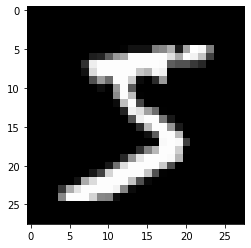

In [134]:
plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.show()

In [135]:
y_train = np.copy(train_labels)
X_3 = X_train[y_train == 3]
X_7 = X_train[y_train == 7]
X_train_subset = np.append(X_3, X_7, axis=0)

In [136]:
y_3 = np.zeros(X_3.shape[0])
y_7 = np.ones(X_7.shape[0])
y_train_subset = np.append(y_3, y_7)

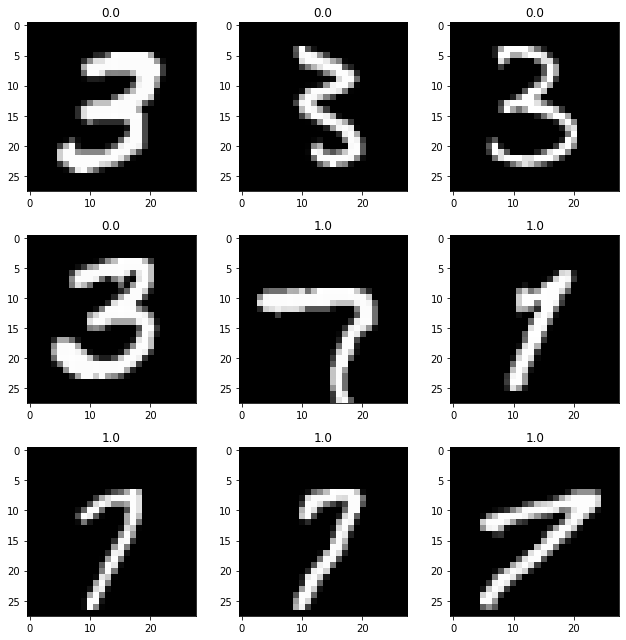

In [137]:
ds_check_indexes = [0, 1000, 5000, 5200, 6200, 11000, 12300, 12301, 12395]

plt.figure(figsize=(9, 9))

for i, index in enumerate(ds_check_indexes):
    plt.subplot(3, 3, i+1)
    plt.title(str(y_train_subset[index]))
    plt.imshow(X_train_subset[index].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=42)

In [139]:
model_2 = Sequential()
model_2.add(Dense(1, input_shape=(784,)))
model_2.add(Activation("sigmoid"))

model_2.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [140]:
history = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5)

Epoch 1/5
 12/155 [=>............................] - ETA: 1s - loss: 23.0832 - accuracy: 0.6680

2022-05-09 15:58:28.219516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


155/155 [==============================] - ETA: 0s - loss: 3.9081 - accuracy: 0.9320

2022-05-09 15:58:29.731070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


155/155 [==============================] - 2s 11ms/step - loss: 3.9081 - accuracy: 0.9320 - val_loss: 1.4058 - val_accuracy: 0.9718
Epoch 2/5
155/155 [==============================] - 2s 11ms/step - loss: 1.0770 - accuracy: 0.9746 - val_loss: 1.0030 - val_accuracy: 0.9766
Epoch 3/5
155/155 [==============================] - 2s 11ms/step - loss: 0.7842 - accuracy: 0.9788 - val_loss: 0.7988 - val_accuracy: 0.9810
Epoch 4/5
155/155 [==============================] - 2s 11ms/step - loss: 0.6149 - accuracy: 0.9820 - val_loss: 0.7017 - val_accuracy: 0.9798
Epoch 5/5
155/155 [==============================] - 2s 11ms/step - loss: 0.4562 - accuracy: 0.9840 - val_loss: 0.6520 - val_accuracy: 0.9810


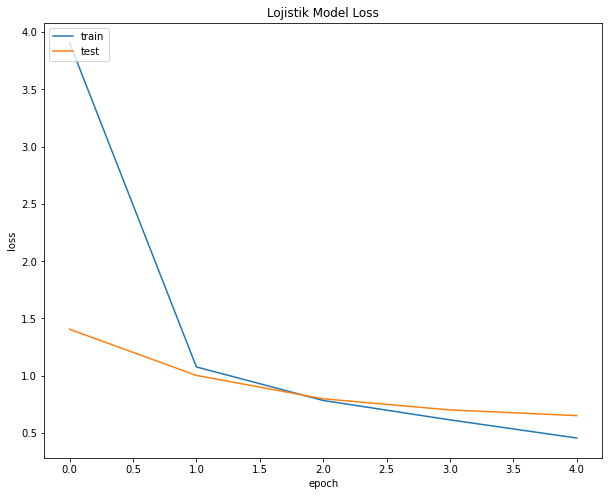

In [141]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lojistik Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2022-05-09 15:58:43.705735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


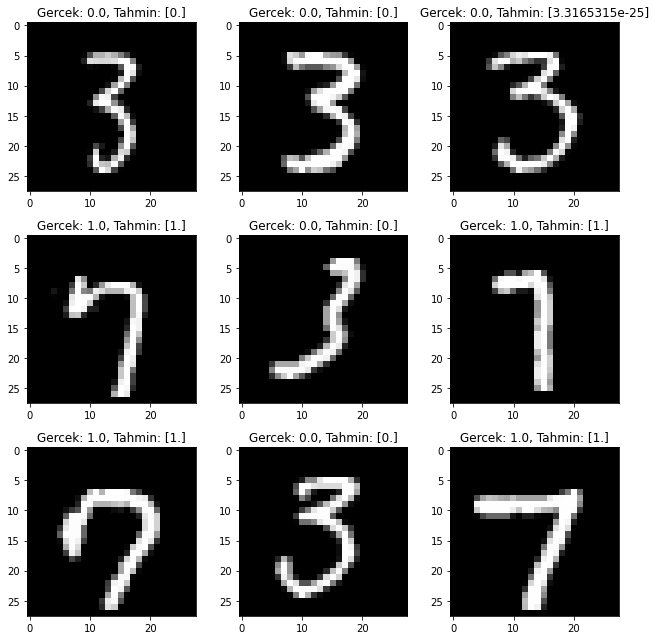

In [142]:
ds_check_indexes = [0, 100, 200, 500, 900, 1290, 1500, 1999, 2479]

plt.figure(figsize=(9, 9))

for i, index in enumerate(ds_check_indexes):
    plt.subplot(3, 3, i+1)
    prediction = model_2.predict([X_test[index].reshape(-1, 784)])
    plt.title(f"Gercek: {str(y_test[index])}, Tahmin: {str(prediction[0])}")
    plt.imshow(X_test[index].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()

## YSA ile resim sınıflandırma
### 1) 4 sınıf - 4 nöron

In [177]:
X_train = train_arr.reshape(60000, -1)
y_train = np.copy(train_labels)

X_1 = X_train[y_train == 1]
count_1 = len(X_1)

X_2 = X_train[y_train == 2]
count_2 = len(X_2)

X_3 = X_train[y_train == 3]
count_3 = len(X_3)

X_4 = X_train[y_train == 4]
count_4 = len(X_4)

X = np.concatenate((X_1, X_2, X_3, X_4), axis=0)

print(count_1, count_2, count_3, count_4)
print(X.shape)

6742 5958 6131 5842
(24673, 784)


In [184]:
y = np.zeros((X.shape[0], 4))
print(y.shape)
print(y[0], y[6000], y[12000], y[24000])

(24673, 4)
[0. 0. 0. 0.] [0. 0. 0. 0.] [0. 0. 0. 0.] [0. 0. 0. 0.]


In [185]:
y[:count_1, :] = [1,0,0,0]
y[count_1:count_1+count_2, :] = [0,1,0,0]
y[count_1+count_2:count_1+count_2+count_3, :] = [0,0,1,0]
y[count_1+count_2+count_3:, :] = [0,0,0,1]

In [186]:
print(y[0], y[7000], y[15000], y[24000])

[1. 0. 0. 0.] [0. 1. 0. 0.] [0. 0. 1. 0.] [0. 0. 0. 1.]


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
model_3 = Sequential()
model_3.add(Dense(4, input_shape=(784,)))
model_3.add(Activation("softmax"))

model_3.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [190]:
history = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=5)

Epoch 1/5


2022-05-09 16:29:08.049080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


309/309 [==============================] - ETA: 0s - loss: 7.1036 - accuracy: 0.8986

2022-05-09 16:29:12.020860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


309/309 [==============================] - 5s 11ms/step - loss: 7.1036 - accuracy: 0.8986 - val_loss: 2.9650 - val_accuracy: 0.9420
Epoch 2/5
309/309 [==============================] - 3s 10ms/step - loss: 2.2826 - accuracy: 0.9507 - val_loss: 2.4790 - val_accuracy: 0.9508
Epoch 3/5
309/309 [==============================] - 3s 10ms/step - loss: 1.8293 - accuracy: 0.9566 - val_loss: 2.8504 - val_accuracy: 0.9343
Epoch 4/5
309/309 [==============================] - 3s 10ms/step - loss: 1.6973 - accuracy: 0.9583 - val_loss: 2.2490 - val_accuracy: 0.9445
Epoch 5/5
309/309 [==============================] - 3s 10ms/step - loss: 1.5431 - accuracy: 0.9606 - val_loss: 2.0048 - val_accuracy: 0.9552


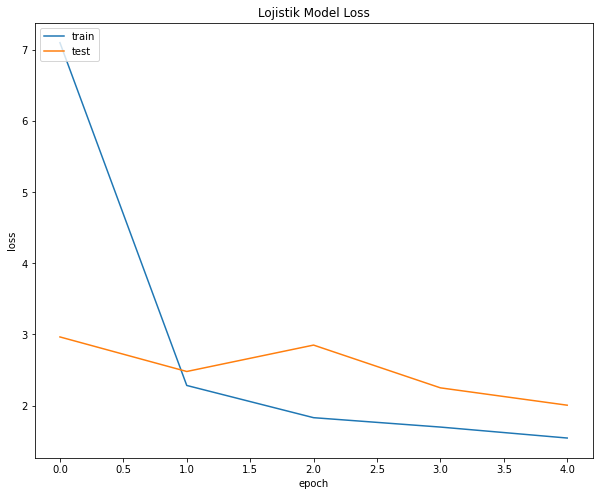

In [191]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lojistik Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

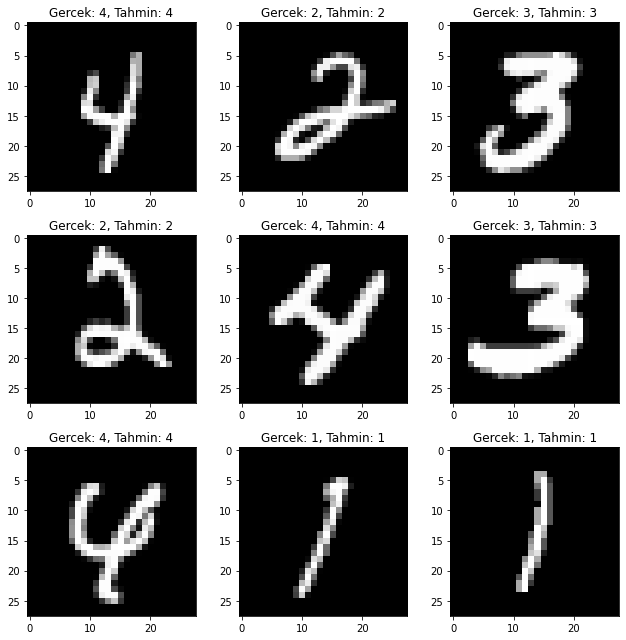

In [204]:
ds_check_indexes = [0, 200, 400, 900, 1800, 2281, 3400, 4100, 4900]

plt.figure(figsize=(9, 9))

for i, index in enumerate(ds_check_indexes):
    plt.subplot(3, 3, i+1)
    prediction = model_3.predict([X_test[index].reshape(-1, 784)])
    gercek = np.argmax(y_test[index]) + 1
    tahmin = np.argmax(prediction) + 1
    plt.title(f"Gercek: {gercek}, Tahmin: {tahmin}")
    plt.imshow(X_test[index].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()